<a href="https://colab.research.google.com/github/olatnattantalo/colabdeeplearning/blob/master/notebooks/Deep_Learning_com_Google_Colab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch; torch.manual_seed(0)
import matplotlib.pyplot as plt

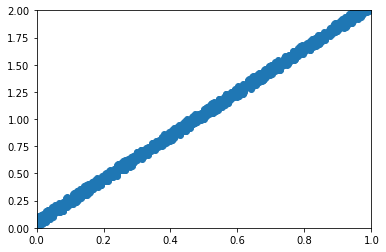

In [0]:
# Geração de dados e visualização.
x = torch.rand(1000, 1)
y = 2 * x +  0.1 * torch.rand(x.size())

plt.scatter(x.data.numpy(), y.data.numpy())
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.show()

In [0]:
# Estrutura da rede neural.
class MyNNet(torch.nn.Module):
    def __init__(self, n_hidden):
        super(MyNNet, self).__init__()
        self.hidden = torch.nn.Linear(1, n_hidden) #uma simples camada de entrada.
        self.relu = torch.nn.ReLU() #ativação da função.
        self.output = torch.nn.Linear(n_hidden, 1) #saída da camada.

    def forward(self, x):
        out = self.hidden(x)
        out = self.relu(out)
        out = self.output(out)
        return out

In [0]:
# Setando o modelo e treinando os componentes.
n_epoch = 10 #rodadas de aprendizado.
learning_rate = 0.001

model = MyNNet(10)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #ajustando os parametros.
loss_func = torch.nn.MSELoss() #calculando as perdas.

In [0]:
for epoch in range(n_epoch):
    for i in range(x.size()[0]):
        y_pred = model(x[i]) #forward pass.
        loss = loss_func(y_pred, y[i])

        optimizer.zero_grad() #limpe gradientes para o próximo passo.
        loss.backward()       #backward pass (passe para trás).
        optimizer.step()      #ajustar parâmetros.

    print(f'Epoch {epoch + 1}. Perda: {loss.item():.4f}')

Epoch 1. Perda: 0.0170
Epoch 2. Perda: 0.0061
Epoch 3. Perda: 0.0012
Epoch 4. Perda: 0.0001
Epoch 5. Perda: 0.0001
Epoch 6. Perda: 0.0006
Epoch 7. Perda: 0.0012
Epoch 8. Perda: 0.0018
Epoch 9. Perda: 0.0022
Epoch 10. Perda: 0.0025


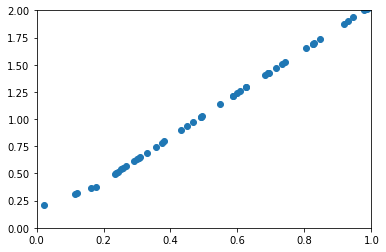

In [0]:
x_test = torch.rand(50, 1)
y_pred = []
with torch.no_grad():
    for i in range(x_test.size()[0]):
	    y_pred.append(model(x_test[i]).item())

plt.scatter(x_test.data.numpy(), y_pred)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.show()

In [0]:
for param_tensor in model.state_dict():
    print(param_tensor)
    print(model.state_dict()[param_tensor])
    print()

hidden.weight
tensor([[ 0.5547],
        [ 0.1284],
        [ 0.1526],
        [ 0.6374],
        [ 1.0640],
        [-0.4040],
        [-0.1096],
        [ 0.5825],
        [-0.4846],
        [ 1.3240]])

hidden.bias
tensor([-0.6850,  0.4552, -0.7183,  0.1971,  0.4783,  0.1762, -0.1002,  0.5312,
        -0.7180, -0.2322])

output.weight
tensor([[-0.2695, -0.1310,  0.0082,  0.3098,  0.7014, -0.1078,  0.2632,  0.2117,
         -0.0865,  0.7219]])

output.bias
tensor([-0.2447])



In [0]:
torch.save(model.state_dict(), '/content/drive/My Drive/simples.pth')

In [0]:
model = MyNNet(10)
model.load_state_dict(torch.load('/content/drive/My Drive/simples.pth'))
model.eval()

MyNNet(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=10, out_features=1, bias=True)
)

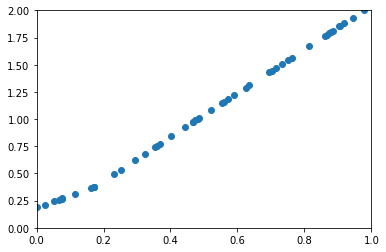

In [0]:
x_test = torch.rand(50, 1)
y_pred = []
with torch.no_grad():
    for i in range(x_test.size()[0]):
	    y_pred.append(model(x_test[i]).item())

plt.scatter(x_test.data.numpy(), y_pred)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.show()

In [0]:
# Setando o modelo e treinando os componentes.
n_epoch = 15 #rodadas de aprendizado.
learning_rate = 0.001

model = MyNNet(15)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #ajustando os parametros.
loss_func = torch.nn.MSELoss() #calculando as perdas.

In [0]:
for epoch in range(n_epoch):
    if epoch == 10:
        break
        
    for i in range(x.size()[0]):
        y_pred = model(x[i]) #forward pass.
        loss = loss_func(y_pred, y[i])

        optimizer.zero_grad() #limpe gradientes para o próximo passo.
        loss.backward()       #backward pass (passe para trás).
        optimizer.step()      #ajustar parâmetros.

    print(f'Epoch {epoch + 1}. Perda: {loss.item():.4f}')

Epoch 1. Perda: 0.0123
Epoch 2. Perda: 0.0021
Epoch 3. Perda: 0.0000
Epoch 4. Perda: 0.0006
Epoch 5. Perda: 0.0014
Epoch 6. Perda: 0.0020
Epoch 7. Perda: 0.0023
Epoch 8. Perda: 0.0025
Epoch 9. Perda: 0.0026
Epoch 10. Perda: 0.0026


In [0]:
torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss
}, '/content/drive/My Drive/simples_v2.tar')

In [0]:
# carregar o checkpoint.
model = MyNNet(15)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #ajustando os parametros.

checkpoint = torch.load('/content/drive/My Drive/simples_v2.tar')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
temp_epoch = checkpoint['epoch'] 
loss = checkpoint['loss']

print(temp_epoch)
print(loss)

10
tensor(0.0026, requires_grad=True)


In [0]:
n_epoch = 30

In [0]:
# continue treinando o modelo.
model.train()
for epoch in range(temp_epoch, n_epoch):
    for i in range(x.size()[0]):
        y_pred = model(x[i]) #forward pass.
        loss = loss_func(y_pred, y[i])

        optimizer.zero_grad() #limpe gradientes para o próximo passo.
        loss.backward()       #backward pass (passe para trás).
        optimizer.step()      #ajustar parâmetros.

    print(f'Epoch {epoch + 1}. Perda: {loss.item():.4f}')

Epoch 11. Perda: 0.0026
Epoch 12. Perda: 0.0026
Epoch 13. Perda: 0.0026
Epoch 14. Perda: 0.0026
Epoch 15. Perda: 0.0025
Epoch 16. Perda: 0.0025
Epoch 17. Perda: 0.0025
Epoch 18. Perda: 0.0025
Epoch 19. Perda: 0.0025
Epoch 20. Perda: 0.0025
Epoch 21. Perda: 0.0025
Epoch 22. Perda: 0.0025
Epoch 23. Perda: 0.0024
Epoch 24. Perda: 0.0024
Epoch 25. Perda: 0.0024
Epoch 26. Perda: 0.0024
Epoch 27. Perda: 0.0024
Epoch 28. Perda: 0.0024
Epoch 29. Perda: 0.0024
Epoch 30. Perda: 0.0024
